# Python - CA 1 - Lee Xuan Rui (P7394128)

In [1]:
# Load in Libraries & Packages

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

print(np.__version__);print(mpl.__version__)

1.19.2
3.3.2


#### **Scenario:** Meet Xiao Ming（小明）and Xiao Li（小丽）, a newly married Couple in Singapore who’s really eager to move in together. Thus, they decided to better understand the Resale and Rental environment in Singapore before making a decision.

#### *Link to Google Slides: https://docs.google.com/presentation/d/1CaXpC-jDA2LxAkx35CKUWyVWT-cg2NxmWnVx-fsDfeg/edit?usp=sharing*

#### *Link to GitHub: https://github.com/ray-xuanruilee/Showcase/tree/main/Python%20Numpy%20%26%20Matplotlib%20-%20SP%20(Jun%2021)*

### **Dataset 1**

#### **A. Dataset & Link:** NUMBER OF RESALE APPLICATIONS REGISTERED BY FLAT TYPE - https://data.gov.sg/dataset/number-of-resale-applications-registered-by-flat-type-quarterly

#### **B. Nature of Dataset**
#### 1. What is in the Dataset: Contains 2 Dimensions: i. Quarter, ii. Flat Type and 1 Metric: Count of Resale Applications.
#### 2. Any pecularities: Formatting Issues: Before 2019 Q2, Flat Type was in Title Case of Lower Case *(e.g. "Executive", "1-room").* However, starting from 2019 Q2, Flat Type is in Upper Case *(e.g. "EXEC", "1-ROOM").*

#### **C. Chart Used: Bar Chart**

#### **D. Insights:**
#### 1. In 2020-Q4, the Flat Type with the greatest number of Resale Applications was 4-ROOM at 3,139 (41.1%).
#### 2. Followed by 5-ROOM at 2,047 (26.8%).

In [2]:
# Step 1: File Input

dataset_1 = np.genfromtxt("CA 1 - Data/Number of Resale Applications by Flat Type.csv",
                          dtype=[("quarter","U50"),("flat_type","U50"),("no_of_resale_applications","i8")],
                          skip_header=1, delimiter=",", missing_values=["na","-"], filling_values=0, autostrip=True)

# Step 2: Processing the data

# 2a. Extract resale applications for 2020, Q4 only and the different Flat Types

resale_applications_2020Q4 = dataset_1[dataset_1["quarter"]=="2020-Q4"]["no_of_resale_applications"]
resale_applications_flatType = dataset_1[dataset_1["quarter"]=="2020-Q4"]["flat_type"]
no_flatType = np.arange(len(resale_applications_flatType))

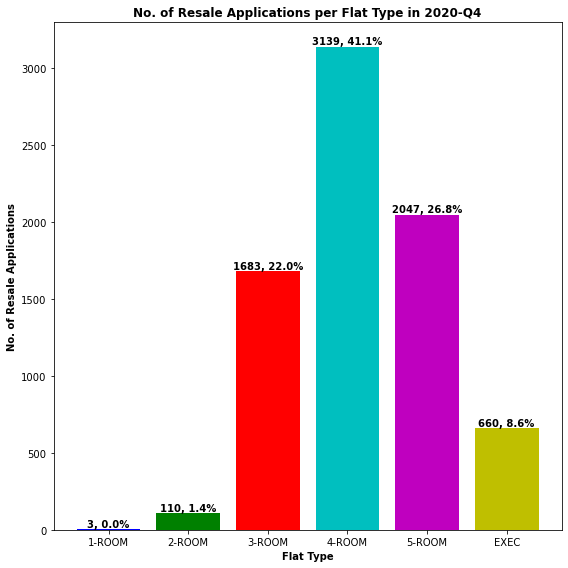

In [3]:
# Step 3: Building the Chart

# 3a Adjust the figure size first
plt.figure(figsize=(8, 8))

# 3b. Build the rest of the Chart elements
plt.bar(no_flatType, resale_applications_2020Q4, color=['b', 'g', 'r', 'c', 'm', 'y'])
plt.xticks(no_flatType, resale_applications_flatType)
plt.title("No. of Resale Applications per Flat Type in 2020-Q4", fontweight="bold")
plt.xlabel("Flat Type", fontweight="bold")
plt.ylabel("No. of Resale Applications", fontweight="bold")

# Step 4: Adding in Descriptors

for index, value in enumerate(resale_applications_2020Q4): # The enumerate() method adds counter to an iterable and returns it (the enumerate object).
    percentage = str(round(value/np.sum(resale_applications_2020Q4)*100,1))+"%"
    value_percentage = str(value) + ", " + percentage
    plt.text(index, value, value_percentage, fontweight="bold", ha="center", va="bottom")

plt.tight_layout()
plt.show()

In [4]:
# Pecularities with data set

np.unique(dataset_1["flat_type"])

array(['1-ROOM', '1-room', '2-ROOM', '2-room', '3-ROOM', '3-room',
       '4-ROOM', '4-room', '5-ROOM', '5-room', 'EXEC', 'Executive'],
      dtype='<U50')

### **Dataset 2**

#### **A. Dataset & Link:** RESALE TRANSACTION BY FLAT TYPE - https://data.gov.sg/dataset/resale-transaction-by-flat-type-based-on-registered-cases

#### **B. Nature of Dataset**
#### 1. What is in the Dataset: Contains 2 Dimensions: i. Financial Year, ii. Flat Type and 1 Metric: Count of Resale Transactions.
#### 2. Any pecularities: Variable Values: Flat Type - From 2014, there are no HUDC flats under HDB's management. (Thus, from 2015 onwards, HUDC is no longer measured in this Dataset.)

#### **C. Chart Used: Line Chart**

#### **D. Insights:**
#### 1. Over the past 5 years, from 2015 to 2019, people bought 4 Room flats as resale the most. Year on Year, the number of 4 Room resale transactions beat any other Flat Types.
#### 2. Coming in closely after 4 Room flats, both 3 Room and 5 Room flats share very similar resale transaction numbers.

In [5]:
# Step 1: File Input

dataset_2 = np.genfromtxt("CA 1 - Data/Resale Transactions by Flat Type.csv",
                         dtype=[("financial_year","i8"),("flat_type","U50"),("resale_transactions","i8")],
                         skip_header=1, delimiter=",", missing_values=["na","-"], filling_values=0, autostrip=True)

# Step 2: Processing the data

# 2a. Filter for the past 5 years of Resale Transaction Data (2015 to 2019, 2020 data is not available)

mask_2015_2019 = dataset_2["financial_year"]>=2015
years_2015_2019 = np.unique(dataset_2[mask_2015_2019]["financial_year"]) # This will form our X-Axis

# 2b. 1 Room Resale Transactions from 2015 to 2019
mask_1room_2015_2019 = dataset_2[mask_2015_2019]["flat_type"] == "1 room"
data_1room_2015_2019 = dataset_2[mask_2015_2019][mask_1room_2015_2019]["resale_transactions"]

# 2c. 2 Rooms Resale Transactions from 2015 to 2019
mask_2room_2015_2019 = dataset_2[mask_2015_2019]["flat_type"] == "2 room"
data_2room_2015_2019 = dataset_2[mask_2015_2019][mask_2room_2015_2019]["resale_transactions"]

# 2d. 3 Rooms Resale Transactions from 2015 to 2019
mask_3room_2015_2019 = dataset_2[mask_2015_2019]["flat_type"] == "3 room"
data_3room_2015_2019 = dataset_2[mask_2015_2019][mask_3room_2015_2019]["resale_transactions"]

# 2e. 4 Rooms Resale Transactions from 2015 to 2019
mask_4room_2015_2019 = dataset_2[mask_2015_2019]["flat_type"] == "4 room"
data_4room_2015_2019 = dataset_2[mask_2015_2019][mask_4room_2015_2019]["resale_transactions"]

# 2f. 5 Rooms Resale Transactions from 2015 to 2019
mask_5room_2015_2019 = dataset_2[mask_2015_2019]["flat_type"] == "5 room"
data_5room_2015_2019 = dataset_2[mask_2015_2019][mask_5room_2015_2019]["resale_transactions"]

# 2g. Executive & Multi-generation Resale Transactions from 2015 to 2019
mask_execMulti_2015_2019 = dataset_2[mask_2015_2019]["flat_type"] == "Executive and Multi-generation"
data_execMulti_2015_2019 = dataset_2[mask_2015_2019][mask_execMulti_2015_2019]["resale_transactions"]

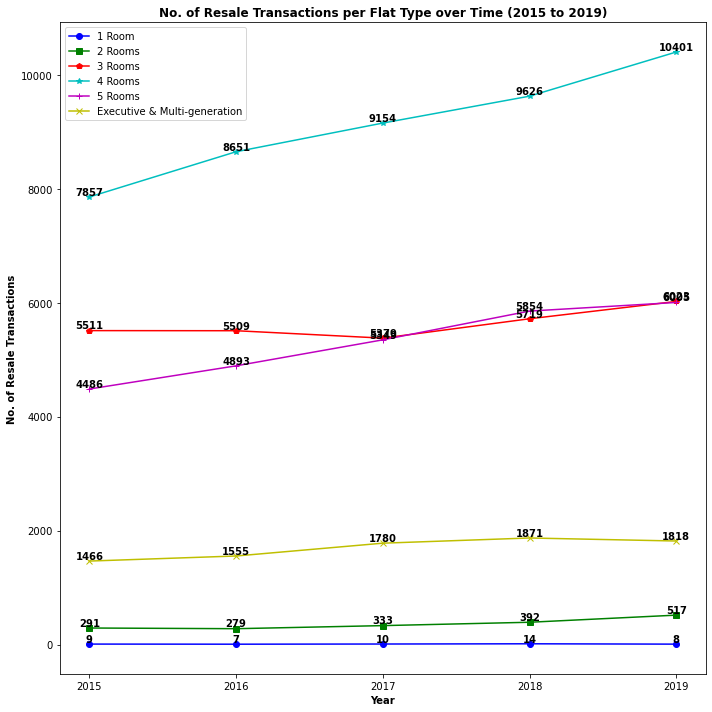

In [6]:
# Step 3: Building the Chart

# 3a Adjust the figure size first
plt.figure(figsize=(10, 10))

# 3b. Build the rest of the Chart elements
plt.plot(years_2015_2019, data_1room_2015_2019, "b-o", label="1 Room")
plt.plot(years_2015_2019, data_2room_2015_2019, "g-s", label="2 Rooms")
plt.plot(years_2015_2019, data_3room_2015_2019, "r-p", label="3 Rooms")
plt.plot(years_2015_2019, data_4room_2015_2019, "c-*", label="4 Rooms")
plt.plot(years_2015_2019, data_5room_2015_2019, "m-+", label="5 Rooms")
plt.plot(years_2015_2019, data_execMulti_2015_2019, "y-x", label="Executive & Multi-generation")
plt.xticks(years_2015_2019, years_2015_2019)

plt.title("No. of Resale Transactions per Flat Type over Time (2015 to 2019)", fontweight="bold")
plt.xlabel("Year", fontweight="bold")
plt.ylabel("No. of Resale Transactions", fontweight="bold")

# Step 4: Adding in Descriptors

for year in years_2015_2019:
    year_mask = dataset_2[mask_2015_2019]["financial_year"] == year
    for transactions in dataset_2[mask_2015_2019][year_mask]["resale_transactions"]:
        plt.text(year, transactions, str(transactions), fontweight="bold", ha="center", va="bottom")

plt.legend()
plt.tight_layout()
plt.show()

### **Dataset 3**

#### **A. Dataset & Link:** RESALE FLAT PRICES - https://data.gov.sg/dataset/resale-flat-prices

#### **B. Nature of Dataset**
#### 1. What is in the Dataset: 8 Dimensions and 3 Metrics, our focus is on the 3 Metrics - i. Floor Area *(Square Metres)*, 2. Remaining Lease, 3. Resale Price
#### 2. Any pecularities: Remaining Lease was formatted as a String and thus has to be converted to Float to be used in our Scatterplot

#### **C. Chart Used: Scatterplot**

#### **D. Insights:**
#### 1. There is a positive, moderate, linear relationship between Floor Area and Resale Price, with a r-value of 0.63.
#### 2. In other words, as Floor Area increases, Resale Price price goes up.
#### 3. Next, Flats with longer Remaining Lease are also more expensive *(they sit above the best fit line).*
#### 4. It is also interesting to observe that newer Flats *(Flats with longer Remaining Lease)* are also smaller - the "yellow" parts of the Scatterplot is focused on the left hand side.

In [7]:
# Step 1: File Input

dataset_3 = np.genfromtxt("CA 1 - Data/Resale Flat Prices (From Jan 2017).csv",
                          dtype=[("month","U50"),("town","U50"),("flat_type","U50"),("block","U50"),("street_name","U50"),
                                 ("storey_range","U50"),("floor_area_sqm","f8"),("flat_model","U50"),("lease_commence_date","U50"),
                                 ("remaining_lease","U50"),("resale_price","f8")],
                          skip_header=1, delimiter=",", missing_values=["na","-"], filling_values=0, autostrip=True) # Strangely, I need to use f8 instead of i8 otherwise the minimum values for Floor Area and Resale Price go to 0...

# Step 2: Processing the data

# 2a: Deriving the array for Floor Area (Explanatory Variable) and Resale Price (Response Variable)
floor_area_sqm = dataset_3["floor_area_sqm"]
resale_price = dataset_3["resale_price"]

# 2b: Convert Remaining Lease from String to Float
remaining_lease = dataset_3["remaining_lease"]
remaining_lease_values = []
for lease in remaining_lease:
    lease_list = lease.split(" ")
    year = int(lease_list[0])
    if len(lease_list)==4:
        month = int(lease_list[2])/12
    remaining_lease_value = round(year + month,2)
    remaining_lease_values.append(remaining_lease_value)

4042.165110607599 54162.86179249771 0.6262631262908465


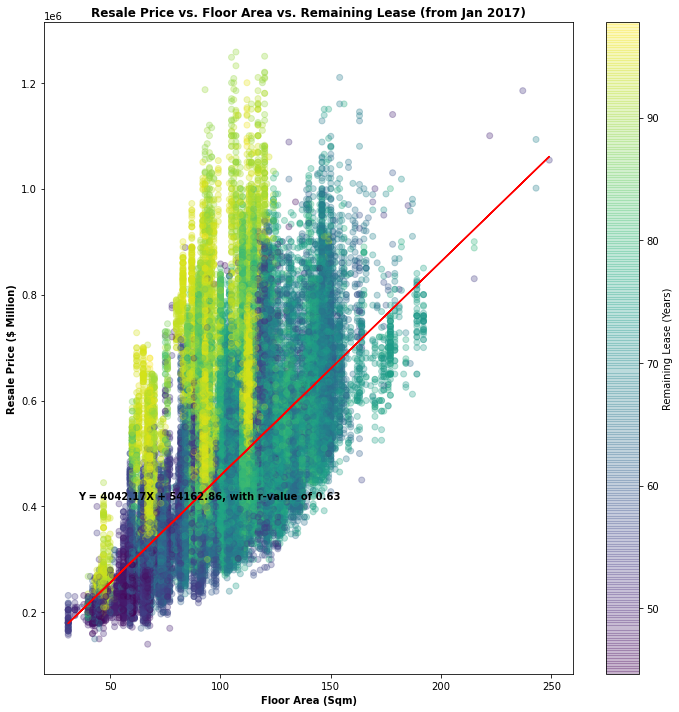

In [8]:
# Step 3: Building the Chart

# 3a Adjust the figure size first
plt.figure(figsize=(10, 10))

# 3b. Plot the best-fit line
m, c = np.polyfit(floor_area_sqm, resale_price, 1)  # m = gradient of slope, c = y-intercept
r = np.corrcoef(floor_area_sqm, resale_price)[0][1] # r = Pearson product-moment correlation coefficients, which explains the linear correlation between two sets of data
print(m,c,r)
plt.text(np.median(floor_area_sqm), np.median(resale_price), "Y = {}X + {}, with r-value of {}".format(round(m,2), round(c,2), round(r,2)), fontweight="bold", ha="center", va="center")
plt.plot(floor_area_sqm, m*floor_area_sqm + c, color="r") # Plotting the best-fit line where y = mx + c and x = x

# 3c. Build the rest of the Chart elements
plt.scatter(floor_area_sqm, resale_price, c=remaining_lease_values, alpha=0.3, cmap='viridis')
plt.colorbar(label="Remaining Lease (Years)")

plt.title("Resale Price vs. Floor Area vs. Remaining Lease (from Jan 2017)", fontweight="bold")
plt.xlabel("Floor Area (Sqm)", fontweight="bold")
plt.ylabel("Resale Price ($ Million)", fontweight="bold")
                              
# Step 4: Adding in Descriptors

plt.tight_layout()
plt.show()

In [9]:
# Data Validation & Checking
print(floor_area_sqm)
print(np.amax(floor_area_sqm), np.amin(floor_area_sqm)) # x-axis
print(np.amax(resale_price), np.amin(resale_price)) # y-axis
print(np.amax(remaining_lease_values), np.amin(remaining_lease_values)) # size / color

[ 44.  67.  67. ... 181. 152. 146.]
249.0 31.0
1258000.0 140000.0
97.75 44.67


### **Dataset 4**

#### **A. Dataset & Link:** MEDIAN RENT BY TOWN AND FLAT TYPE - https://data.gov.sg/dataset/median-rent-by-town-and-flat-type

#### **B. Nature of Dataset**
#### 1. What is in the Dataset: Contains 3 Dimensions: i. Quarter, ii. Town, iii. Flat Type and 1 Metric: Median Rent.
#### 2. Any pecularities: 
#### i. Data cleaning is required for 8 Lines - 9745, 9746, 0747, 0763, 9764, 9781, 9782, 9783, they contain an additional "," which affects File Input *(cleaned manually)*.
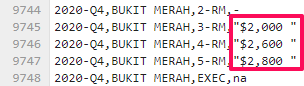
#### ii. Missing Values / 0 Values are also removed so the boxplot makes sense. *(0 Values occur when data is not available, not applicable, negligible or not significant.)*

#### **C. Chart Used: Boxplot**

#### **D. Insights:**
#### 1. Unsurprisingly, the more Rooms or bigger the house, the higher the Median Rent values - with 2 Room at the lowest with 1500 and Exec at the highest with 2300.
#### 2. Additionally, the Median Rent values of 5 Room flats show the greatest spread since it has the widest boxplot.
#### 3. It was also interesting to observer that 1 Room flats are not rented out *(or HDB simply does not have data here)*.

In [10]:
# Step 1: File Input

dataset_4 = np.genfromtxt("CA 1 - Data/Median Rent by Town and Flat Type.csv",
                         dtype=[("quarter","U50"),("town","U50"),("flat_type","U50"),("median_rent","i8")],
                         skip_header=1, delimiter=",", missing_values=["na","-"], filling_values=0, autostrip=True)

# Step 2: Processing the data

# 2a. 1 Room Median Rent values from 2005 Q2 to 2021 Q1
median_rent_1rm = dataset_4[dataset_4["flat_type"] == "1-RM"]["median_rent"]
median_rent_1rm = median_rent_1rm[median_rent_1rm>0] # Remove 0 values from the array

# 2b. 2 Room Median Rent values from 2005 Q2 to 2021 Q1
median_rent_2rm = dataset_4[dataset_4["flat_type"] == "2-RM"]["median_rent"]
median_rent_2rm = median_rent_2rm[median_rent_2rm>0] # Remove 0 values from the array

# 2c. 3 Room Median Rent values from 2005 Q2 to 2021 Q1
median_rent_3rm = dataset_4[dataset_4["flat_type"] == "3-RM"]["median_rent"]
median_rent_3rm = median_rent_3rm[median_rent_3rm>0] # Remove 0 values from the array

# 2d. 4 Room Median Rent values from 2005 Q2 to 2021 Q1
median_rent_4rm = dataset_4[dataset_4["flat_type"] == "4-RM"]["median_rent"]
median_rent_4rm = median_rent_4rm[median_rent_4rm>0] # Remove 0 values from the array

# 2d. 5 Room Median Rent values from 2005 Q2 to 2021 Q1
median_rent_5rm = dataset_4[dataset_4["flat_type"] == "5-RM"]["median_rent"]
median_rent_5rm = median_rent_5rm[median_rent_5rm>0] # Remove 0 values from the array

# 2e. Exec Median Rent values from 2005 Q2 to 2021 Q1
median_rent_exec = dataset_4[dataset_4["flat_type"] == "EXEC"]["median_rent"]
median_rent_exec = median_rent_exec[median_rent_exec>0] # Remove 0 values from the array

# 2f. Add all the values into an array
median_rent_values_array = [median_rent_1rm, median_rent_2rm, median_rent_3rm, median_rent_4rm, median_rent_5rm, median_rent_exec]

# 2g: Determine the X-Axis labels
rent_flat_type = np.unique(dataset_4["flat_type"])

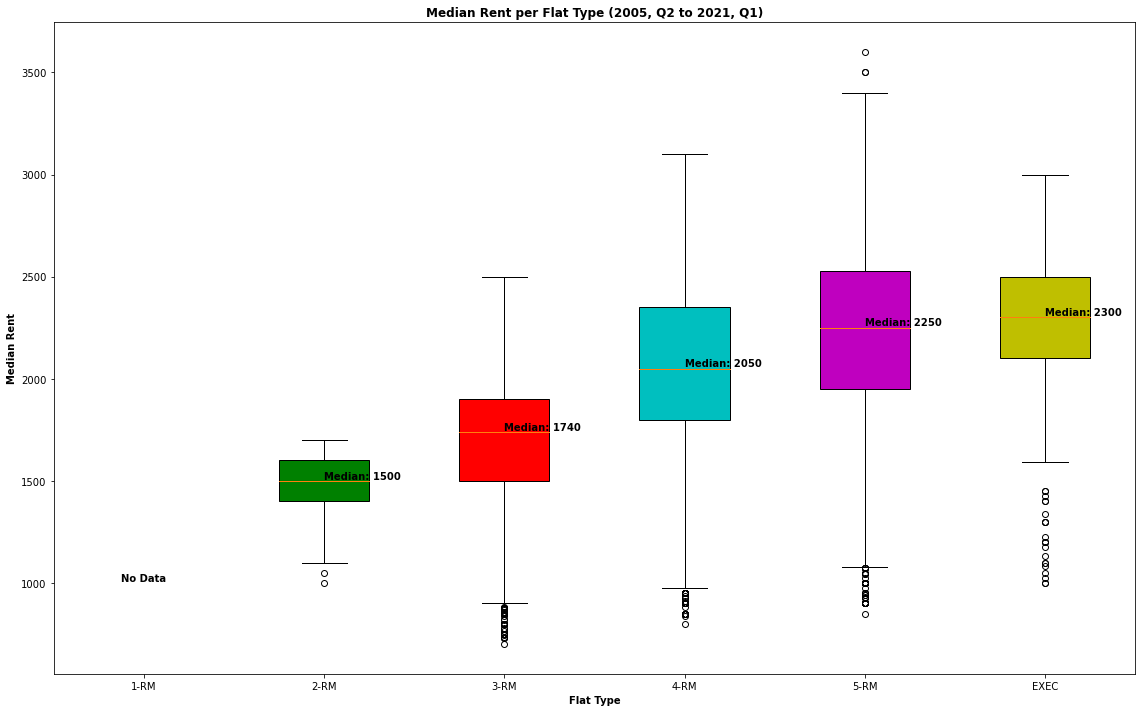

In [11]:
# Step 3: Building the Chart

# 3a Adjust the figure size first
plt.figure(figsize=(16, 10))

# 3b. Build the rest of the Chart elements
boxplot = plt.boxplot(median_rent_values_array, labels=rent_flat_type, patch_artist=True)

colors = ['b', 'g', 'r', 'c', 'm', 'y']
patchcolor = list(zip(boxplot['boxes'], colors))
for patch, color in patchcolor:
    patch.set_facecolor(color)

plt.title("Median Rent per Flat Type (2005, Q2 to 2021, Q1)", fontweight="bold")
plt.xlabel("Flat Type", fontweight="bold")
plt.ylabel("Median Rent", fontweight="bold")

# Step 4: Adding in Descriptors

for line in boxplot["medians"]:
    x, y = line.get_xydata() # Retrieve top of median line, get_xydata() = Return the xy data as a Nx2 numpy array.
    if math.isnan(y[1]) == True:
        plt.text(1, 1000, "No Data", fontweight="bold", ha="center", va="bottom")
    else:
        plt.text(x[0]+0.25, y[1], "Median: {}".format(int(y[1])), fontweight="bold", ha="left", va="bottom") # Overlay median value

plt.tight_layout()
plt.show()

### The End
### Thank You!